# Dimensional Analysis and Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

## Bike drag data


|Velocity (x10 ft/s) | 0 |2|  4  |  6 | 8 | 10 |
|-------------------------|---|---|---| --- | --- | --- |
|Drag (x100 lbs) | 0 |2.90 |14.8|  39.6 | 74.3 | 119 |


1.203123903123903 -2.347876447876466


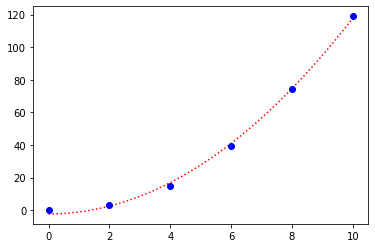

In [9]:
vel = np.array([0,2.,4.,6.,8.,10.])
drag = np.array([0, 2.9, 14.8, 39.6, 74.3, 119.])

w = vel*vel

m, b = np.polyfit(w,drag,deg=1)
print(m,b)

vs = np.linspace(0,10,101)
ds = m*vs**2 + b

plt.plot(vs,ds,'r:',vel, drag, 'bo');

#con = drag/vel**2
#print(con)

### Nuclear blasts

During World War II, the British government
cooperated with the US on the development
of the atomic bomb in the Manhattan project.
G. I. Taylor, a British fluid dynamicist, was
asked by his government to study mechanical
ways of measuring the bomb’s yield (energy
output).

He didn't have direct access to the development team, but he did see the images of test explosions.

He used dimensional analysis to estimate how
the radius would scale with the other physical
variables.
From his work in fluids, Taylor assumed
the relevant variables would be:
 - $r$, the radius of the shock front.
 - $\rho$, density of surrounding air.
 - $E$, energy released by the device.
 - $t$, the time at which the front reaches $r$.

Assume the density of air $\rho = 1.25$ kg/m$^3$. Estimate the energy of a bomb using the data below. Note that 1 kiloton of TNT is about $4.2 \times 10^{12}$J.

|$t$| 0.10 | 0.52 | 1.08 | 1.5 | 1.93 | 4.07 | 15.0 | 34.0 |
|---|---|---|---|---|---|---|---|---|
|$r$| 11.1 | 28.2 | 38.9 | 44.4 | 48.7 | 64.3 | 106.5 | 145|

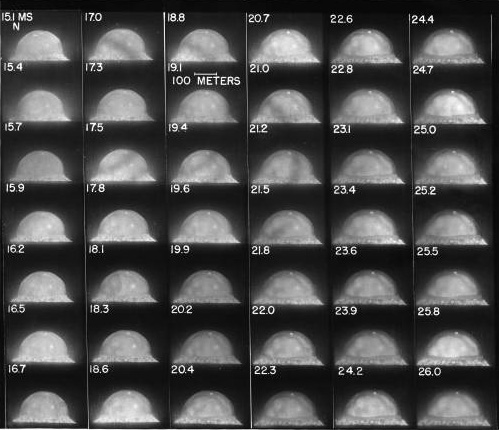

55453840.10220059


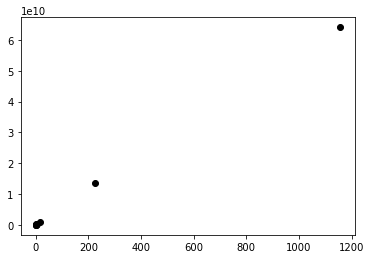

In [11]:
tdata = np.array([0.10,0.52,1.08,1.5,1.93,4.07,15.0,34.0])
rdata = np.array([11.1,28.2,38.9,44.4,48.7,64.3,106.5,145.])

m,b = np.polyfit(tdata**2,rdata**5,deg=1)
print(m)

plt.plot(tdata**2,rdata**5,'ko');

### Read in data from file 
There are many ways to read in a file with python. Here we'll use the [loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) command in the numpy library to read in data from a tensile load test that gives data relating the stress on a steel wire and its elongation (or strain). The data will be saved right to a numpy array with this function. 
- Download the wire_stress_strain.csv file from Canvas and save it to your working directory. 
- Open it in a text editor or MS Excel.
- Open the file using loadtxt.
- Plot the data.


[[1.         0.99945431]
 [0.99945431 1.        ]]


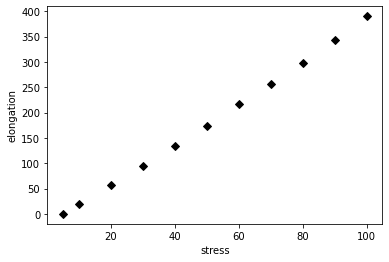

In [7]:
data = np.loadtxt('./wire_stress_strain.csv',delimiter=',',skiprows=1)

stressdata = data[:,0]
straindata = data[:,1]

plt.plot(stressdata,straindata,'kD');
plt.xlabel('stress');
plt.ylabel('elongation');

print(np.corrcoef(stressdata,straindata))
#print(data)

### built in command polyfit in the numpy library
There are many built-in commands that do linear regression. Some have more bells and whistles than others with what they report about statistics, etc., but we'll stick with the [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) command for now. We don't need to import any new command or libraries for this.

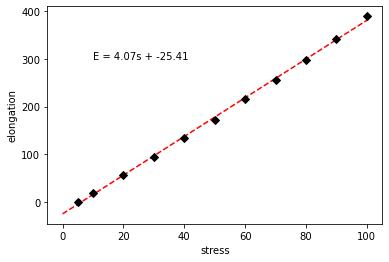

In [10]:
coeffs = np.polyfit(stressdata,straindata,deg=1)

m = coeffs[0]
b = coeffs[1]

ss = np.linspace(0,100,1001)
es = m*ss + b

plt.plot(ss,es,'r--',stressdata,straindata,'kD');
plt.xlabel('stress');
plt.ylabel('elongation');
plt.text(10,300,f"E = {m:2.2f}s + {b:2.2f}");

### Solar panels
- Read in the file solarpanels.csv
- Plot the year since 1982 versus the solar panel capacity made
- Is a linear trend good here? why or why not?

3.063777089783338


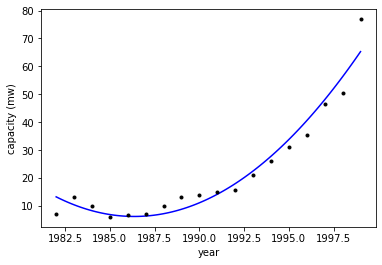

In [12]:
data = np.loadtxt('./solarpanels.csv',delimiter=",",skiprows=4)
yeardata = data[:,0]
capdata = data[:,1]

coeffs = np.polyfit(yeardata,capdata,deg=2)

ys = np.linspace(min(yeardata),max(yeardata),101)
cs = coeffs[0]*ys**2 + coeffs[1]*ys+ coeffs[2]

plt.plot(ys,cs,'b',yeardata,capdata,'k.');
plt.xlabel('year');
plt.ylabel('capacity (mw)');

#print(np.corrcoef(yeardata,capdata))

print(m)

[0.17467024 1.18450699]
3.2543742028896707


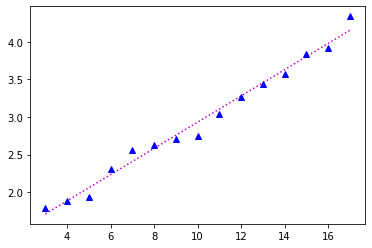

In [18]:
tdata = yeardata[3:] - 1982
logcapdata = np.log(capdata[3:])

coeffs = np.polyfit(tdata,logcapdata,deg=1)

nts = np.linspace(3,17,101)
nlcs = coeffs[0]*nts + coeffs[1]

plt.plot(nts,nlcs,'m:',tdata,logcapdata,'b^');
print(coeffs)
print(np.exp(1.18))

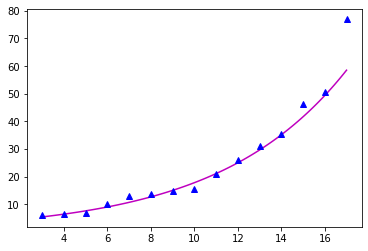

In [20]:
plt.plot(nts,3.25*np.exp(0.17*nts),'m',tdata,capdata[3:],'b^');

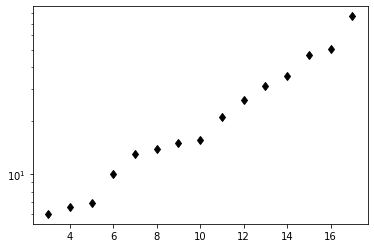

In [21]:
cdata = capdata[3:]

plt.semilogy(tdata,cdata,'kd');

### River entrainment speeds
Rivers and streams carry small solid particles of rock and mineral downhill, either suspended in the water column ("suspended load") or bounced, rolled or slid along the river bed ("bed load"). Solid particles are classified according to their mean diameter from smallest to largest as clay, silt, sand, pebble, cobble and boulder.

During low velocity flow, only very small particles (clay and silt) can be transported by the river, whereas during high velocity flow, much larger particles may be transported. There are two steps in transporting a sediment particle in suspension. First, the velocity must be high enough to entrain or lift the particle from the river bed. Entrainment velocities are usually very high for both clay sized particles (which are "sticky") and large particles (which are heavy). Second, the velocity must be high enough to keep the particle in suspension. For very small particles, the speed necessary for a particle to remain in suspension is often lower than the entrainment velocity.

The data in riverspeeds.csv show the speed necessary to carry particles in suspension, once they have been entrained. 

- Plot the size of the entrained particle size in suspension against the river speed.
- Is a linear regression good here?
- Is an exponential fit appropriate?
- Plot the data on a log log scale.
- Fit a line to this data.
- What is the relationship between the variables?

1.8943798197966288 1.2489616192033506


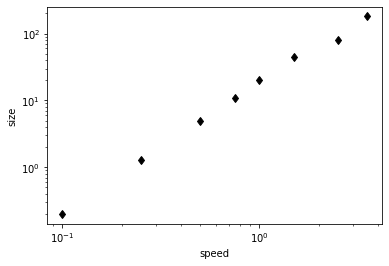

In [28]:
data = np.loadtxt('./riverspeeds.csv',delimiter=',',skiprows=5,usecols=(0,1))
sizedata = data[:,0]
speeddata = data[:,1]

plt.loglog(speeddata,sizedata,'kd');
plt.xlabel('speed');
plt.ylabel('size');

m,b = np.polyfit(np.log10(speeddata),np.log10(sizedata),deg=1)
print(m,b)

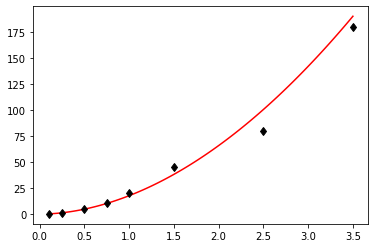

In [29]:
ss = np.linspace(min(speeddata),max(speeddata),101)
szs = 10**b * ss**m

plt.plot(ss,szs,'r',speeddata,sizedata,'kd');

### Sales data

Consider a situation where we are selling widgets for price $x$. If we sell widgets for price $x$ then we can make a profit $P$. If the price decreases, we can sell more, but we get less for each widget. If we raise the price, we sell less, but we get more for each widget. We have sale data below. What is the relationship between price and profit? How can we use this?

In [ ]:
x = np.array([1.,   1.05, 1.1,  1.15, 1.2,  1.25, 1.3,  
              1.35, 1.4,  1.45, 1.5,  1.55, 1.6,  1.65,
              1.7,  1.75, 1.8,  1.85, 1.9,  1.95, 2.  ])
P = np.array([42.26, 47.18, 50.58, 54.61, 58.76, 61.04, 64.46,
              64.43, 65.69, 70.66, 71.46, 73.40, 73.81, 74.58,
              73.76, 73.32, 76.59, 72.82, 71.73, 72.04, 70.36])

### checking residuals
Calculate the residuals for a linear regression above and plot these against $x$.

### velocity versus discharge at Soos Creek

The size of a stream or river at any given point along the stream can be quantified by measuring the width of the "wetted perimeter" of the channel, the mean depth of the water in the channel, and the mean speed or velocity of the stream. These three measurements can be multiplied together to calculate the stream's discharge at a station, which is the volume of water passing by in a given amount of time. Discharge is typically measured in cubic meters or cubic feet per second, though in very low flows, gallons per minute might be used.

At a remote stream gauging station, the height of the water (gage height) is measured and transmitted via satellite to a central recording facility. Empirical relationships (based on many measurements) between gage height, velocity, mean depth and mean width are used to calculate discharge. Therefore, one key task in this process is to actually measure mean velocity at various gage heights.

The velocity at any point in a river is controlled by a number of factors, including the river's slope or gradient, roughness of the channel bed, turbulence of the flow, depth of the river, etc. Typically, water moves faster away from the bed of the river, where obstacles create drag and turbulence. The highest velocity overall is usually in the deepest part of the channel, just below the surface. And therefore the deeper the water, the higher the velocity (for confined channel flow).

A river accommodates increasing discharge by widening, deepening and speeding up. Naturally we would expect some sort of positive correlation between observed discharge and observed velocity. The data in the table, collected by the United States Geological Survey for Soos Creek in Washington State, shows the expected positive relationship. However, the relationship is highly non-linear. Velocity increases rapidly with increasing discharge, but then flattens out, perhaps approaching some limit.

- Read in the data from soos_discharge.csv.
- Plot the data.
- Use the ideas above to see if you can come up with a model that explains the relationship between the variables.

[ 2.29452089 -2.18902833]


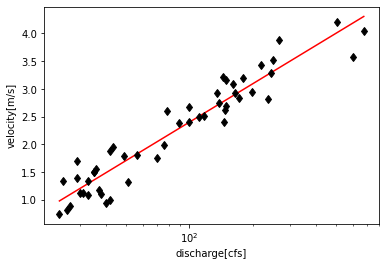

In [36]:
data = np.loadtxt('./soos_discharge.csv',delimiter=',',skiprows=3,usecols=(2,3))

veldata = data[:,1]
dischargedata = data[:,0]

coeffs = np.polyfit(np.log10(dischargedata),veldata,deg=1)

ds = np.linspace(min(dischargedata),max(dischargedata),101)
vs = coeffs[0]*np.log10(ds) + coeffs[1]

plt.semilogx(ds,vs,'r',dischargedata,veldata,'kd');
plt.xlabel('discharge[cfs]');
plt.ylabel('velocity[m/s]');
print(coeffs)